#### Libraries

In [1]:
import pandas as pd
import datetime as dt
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from utilities import *

#### Search rates

We define search rates by training a logistic regression over some of the features
- Search rate 1 (sr1) = ln(date + age + sex)
- Search rate 2 (sr2) = ln(date + age + sex + {interactions})

In [2]:
# Download all data once in pickle format !!!!
data_url_AZ = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_az_statewide_2020_04_01.csv.zip'
data_url_IL = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_il_statewide_2020_04_01.csv.zip'
data_url_CT = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ct_statewide_2020_04_01.csv.zip'
data_url_CA = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ca_statewide_2020_04_01.csv.zip'
data_url_SC = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_sc_statewide_2020_04_01.csv.zip'
data_url_TX = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_tx_statewide_2020_04_01.csv.zip'

In [3]:
load_data_to_pickle(data_url_TX, 'df_AZ')

/opt/anaconda3/envs/ada/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (3,7,8,18,19,20,21,22,23,24,25,26,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


pickle-rick reporting for duty


In [6]:
# Loading in less than 1 min
df = pd.read_pickle('df_AZ')
df.shape

(3498159, 29)

In [7]:
df

,raw_row_number,date,time,location,county_name,subject_race,subject_sex,officer_id_hash,type,violation,...,search_vehicle,search_basis,reason_for_stop,vehicle_type,vehicle_year,raw_Ethnicity,raw_OutcomeOfStop,raw_ReasonForStop,raw_TypeOfSearch,raw_ViolationsObserved
0,1,2009-01-06,01:00:00,I10 165,Maricopa County,hispanic,male,08a56c4f70,vehicular,other moving violation,...,False,NaN,Moving violation,12PU,2007.0,H,WA,H,NaN,OM
1,2,2009-01-18,01:58:00,US60 185,Maricopa County,white,male,08a56c4f70,vehicular,speed,...,False,NaN,Moving violation,4DSD,2004.0,W,WA,H,NaN,SP
2,3,2009-01-20,01:25:00,SR202 16,Maricopa County,hispanic,male,08a56c4f70,vehicular,NaN,...,False,NaN,Moving violation,4DSD,2001.0,H,WA,H,NaN,LU
3,4,2009-01-24,19:52:00,US60 172.4,Maricopa County,hispanic,female,08a56c4f70,vehicular,NaN,...,False,NaN,Moving violation,4DSD,2003.0,H,CI,H,NaN,LU
4,5,2009-01-25,02:25:00,US60 181,Maricopa County,white,female,08a56c4f70,vehicular,NaN,...,False,NaN,Moving violation,4DSD,2001.0,W,WA,H,NaN,LU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498154,3498155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vehicular,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3498155,3498156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vehicular,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3498156,3498157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vehicular,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3498157,3498158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vehicular,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
def plot_regression_model(model, predictors):
    '''
    Plot weights for each predictor
    Input : model -> regression model (statsmodel)
          : predictors -> name of the predictors for plot (I didn't find how to retrive them from model)
    Output : matplotlib axis
    '''
    x = predictors
    y = model.params 
    ax = sns.barplot(x=x, y=y)
    return ax

In [5]:
df = pd.read_csv('data.csv')

formula1 = 'search_conducted ~ date + C(subject_race) + C(subject_sex) + C(Partisanship)'
search_rates1, sr1 = compute_search_rates(df, formula1)
sr1.summary()

Optimization terminated successfully.
         Current function value: 0.150392
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       search_conducted   No. Observations:              1800000
Model:                          Logit   Df Residuals:                  1799994
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                 0.01971
Time:                        12:26:00   Log-Likelihood:            -2.7071e+05
converged:                       True   LL-Null:                   -2.7615e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.1061      0.012   -266.677      0.000      -3.129      -3.083
C(subject_race)[T.hispanic]    -0.1251      0.011    -11.053      0.000      -0.147      -0.103
C(subject_race)[T.white]       -0.6753      0.010    -65.007      0.000      -0.696      -0.655
C(subject_sex)[T.male]          0.5227      0.010     54.891      0.000       0.504       0.541
C(Partisanship)[T.R]           -0.3640      0.008    -44.479      0.000      -0.380      -0.348
date                           -0.0427      0.004    -10.559      0.000      -0.051      -0.035
===============================================================================================
"""

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intercept'),
  Text(1, 0, 'Hispanic(1=hispanic)'),
  Text(2, 0, 'White(1=white)'),
  Text(3, 0, 'Sex(1=male)'),
  Text(4, 0, 'Partisanship(1=R)'),
  Text(5, 0, 'date')])

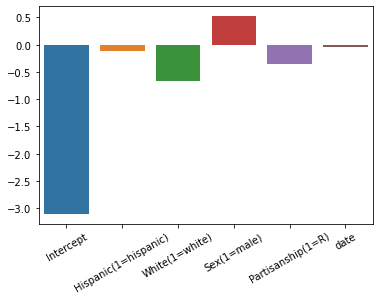

In [11]:
predictors1 = ['Intercept', 'Hispanic(1=hispanic)', 'White(1=white)', 'Sex(1=male)', 'Partisanship(1=R)','date']
ax = plot_regression_model(sr1, predictors1)
plt.xticks(rotation=30)

In [12]:
formula2 = 'search_conducted ~ date + C(subject_race):C(Partisanship) + C(subject_sex)'
search_rates2, sr2 = compute_search_rates(df, formula2)
sr2.summary()

Optimization terminated successfully.
         Current function value: 0.150300
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       search_conducted   No. Observations:              1800000
Model:                          Logit   Df Residuals:                  1799992
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                 0.02031
Time:                        12:35:59   Log-Likelihood:            -2.7054e+05
converged:                       True   LL-Null:                   -2.7615e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -2.9849      0.013   -227.815      0.000      -3.011      -2.959
C(subject_sex)[T.male]                             0.5219      0.010     54.780      0.000       0.503       0.541
C(Partisanship)[T.R]                              -0.6419      0.017    -36.717      0.000      -0.676      -0.608
C(subject_race)[T.hispanic]:C(Partisanship)[D]    -0.2858      0.015    -19.115      0.000      -0.315      -0.256
C(subject_race)[T.white]:C(Partisanship)[D]       -0.8258      0.013    -61.198      0.000      -0.852      -0.799
C(subject_race)[T.hispanic]:C(Partisanship)[R]     0.0821      0.017      4.730      0.000       0.048       0.116
C(subject_race)[T.white]:C(Partisanship)[R]       -0.4745      0.016    -29.166      0.000      -0.506      -0.443
date                                              -0.0430      0.004    -10.613      0.000      -0.051      -0.035
==================================================================================================================
"""

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Intercept'),
  Text(1, 0, 'Male'),
  Text(2, 0, 'Republican'),
  Text(3, 0, 'Hispanic*Democrate'),
  Text(4, 0, 'White*Democrate'),
  Text(5, 0, 'Hispanic*Republican'),
  Text(6, 0, 'White*Republican'),
  Text(7, 0, 'date')])

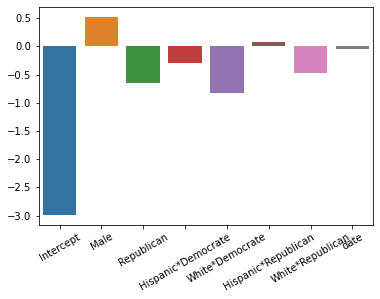

In [15]:
predictors2 = ['Intercept', 'Male', 'Republican', 'Hispanic*Democrate', 'White*Democrate', 'Hispanic*Republican', 'White*Republican', 'date']
ax2 = plot_regression_model(sr2, predictors2)
plt.xticks(rotation=30)